In [1]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [3]:
if not GEMINI_API_KEY:
    raise ValueError("GEMINI_API_KEY is missing in your .env")
os.environ["GEMINI_API_KEY"] = GEMINI_API_KEY

In [4]:
from google import genai

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))

for model in client.models.list():
    print(model.name)

models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview-10-2025
models/deep-research-pro-preview-12-2025
models/gemini-embedding-001
models/aqa
models/imagen-4.0-generate-preview-06-06
models/imagen

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [7]:
chat_llm = ChatGoogleGenerativeAI(model ="gemini-2.5-flash", temperature=0.7)

In [8]:
print(chat_llm)

profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True} google_api_key=SecretStr('**********') model='gemini-2.5-flash' client=<google.genai.client.Client object at 0x000001A459D1A330> default_metadata=() model_kwargs={}


In [9]:
chat_llm.invoke('Hello, How are you?').content

"Hello! I'm an AI, so I don't experience feelings, but I'm ready and functioning perfectly.\n\nHow can I help you today?"

In [10]:
from typing_extensions import TypedDict, Annotated
import operator

In [11]:
from langchain_core.messages import AnyMessage, HumanMessage,AIMessage, SystemMessage

In [12]:
from langgraph.graph import StateGraph

In [13]:
# help(StateGraph)

In [14]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
# help(operator)

In [15]:
# ['hai'] ['hai', 'how are you'] like this we can append in the list of messages

In [16]:
def llm_call(state: GraphState) -> dict:
    """Call the LLM using conversation messages and append AI response."""
    response = chat_llm.invoke(state["messages"])  # AIMessage
    return {"messages": [response]}

In [17]:
def token_counter(state: GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }

In [18]:
builder = StateGraph(GraphState)

In [19]:
builder.add_node("llm_call", llm_call)
builder.add_node("token_counter", token_counter)

In [20]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")
builder.set_finish_point("token_counter")

In [21]:
app = builder.compile()

In [22]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [23]:
from IPython.display import Image, display

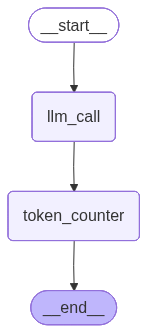

In [24]:
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({
    "messages": [HumanMessage(content="Hi, this is Raj Kumar Malyala. Say hello in detail.")]
})

ChatGoogleGenerativeAIError: Error calling model 'gemini-2.5-flash' (RESOURCE_EXHAUSTED): 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 11.344513556s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash'}, 'quotaValue': '20'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '11s'}]}}

In [ ]:
result['messages'][1].content

"Hello there, Raj Kumar Malyala!\n\nA very warm welcome to you! It's a pleasure to connect and hear from you.\n\nI'm here and ready to assist you with whatever you need. How may I help you today, Raj Kumar Malyala? Please feel free to share what's on your mind or what you'd like to discuss. I'm listening!"

: 

In [26]:
{
    "messages": [HumanMessage(content="Hi, this is Sunny. Say hello in detail.")]
}

{'messages': [HumanMessage(content='Hi, this is Sunny. Say hello in detail.', additional_kwargs={}, response_metadata={})]}

In [27]:
result

{'messages': [HumanMessage(content='Hi, this is Raj Kumar Malyala. Say hello in detail.', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello there, Raj Kumar Malyala!\n\nA very warm welcome to you! It's a pleasure to connect and hear from you.\n\nI'm here and ready to assist you with whatever you need. How may I help you today, Raj Kumar Malyala? Please feel free to share what's on your mind or what you'd like to discuss. I'm listening!", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c7558-a08a-7f50-8eb4-24749f240877-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 1105, 'total_tokens': 1121, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1023}}),
  AIMessage(content='Total token number in the generated answer (word count) is 57', additional_kwargs={}, response_me

In [28]:
for m in result["messages"]:
    print(type(m).__name__, ":", m.content)

HumanMessage : Hi, this is Raj Kumar Malyala. Say hello in detail.
AIMessage : Hello there, Raj Kumar Malyala!

A very warm welcome to you! It's a pleasure to connect and hear from you.

I'm here and ready to assist you with whatever you need. How may I help you today, Raj Kumar Malyala? Please feel free to share what's on your mind or what you'd like to discuss. I'm listening!
AIMessage : Total token number in the generated answer (word count) is 57


In [29]:
chat_llm

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x00000189CCB43E60>, default_metadata=(), model_kwargs={})

In [ ]:
from langchain_community.tools import WikipediaQueryRun # It is the inbuilt tool from the langchain_community package to query Wikipedia
from langchain_community.utilities import WikipediaAPIWrapper 

In [ ]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max= 500) # top_5 it index the top 5 results with the 500 words

In [ ]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper) # fetch any sort of information from the internet using the wikidedia tool

In [34]:
wiki_tool.run({'query':"Generative AI"})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

In [35]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [39]:
try:
    api_key = os.getenv("TAVILY_API_KEY")
    print(api_key)
except Exception as e:
    print(f"Error retrieving API key: {e}")

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


In [40]:
import os
print("TAVILY_API_KEY" in os.environ)

True


In [41]:
tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

C:\Users\SPSOFT\AppData\Local\Temp\ipykernel_18964\1068719361.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [42]:
tool.invoke({"query":"how is the job market for fresh graduates in 2026?"})

[{'title': 'The 2026 Job Market: Supporting Students and Closing the Skills Gap',
  'url': 'https://findingequilibriumfuturehighered.substack.com/p/the-2026-job-market-supporting-students',
  'content': "# Finding Equilibrium: Two Economists on Higher Ed's Future\n\n# The 2026 Job Market: Supporting Students and Closing the Skills Gap\n\n### Ideas for Preparing More Career-Ready Graduates\n\nJay Akridge and David Hummels\n\nDec 19, 2025\n\nWe’ve written a couple of times this fall on the current job market for new college graduates. The bottom-line: the Class of 2026 is likely to have more trouble finding a job.\n\nStudents are concerned: about 61% of the Class of 2026 students find current news about the job market somewhat or very pessimistic – up from 50% for the Class of 2024. High competition for jobs and lack of available jobs top the list of reasons for that pessimism, with the political climate and AI much more important factors this year relative to last.\n\nSource: Handshake.

In [43]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [44]:
search.invoke("what is the latest update on iphone17 release?")

Impersonate 'chrome_118' does not exist, using 'random'


"4 days ago - It was announced on June 5, 2023, at Apple's annual Worldwide Developers Conference alongside watchOS 10, iPadOS 17, tvOS 17 and macOS Sonoma. It was made publicly available on September 18, 2023 , as a free software update for supported iOS devices (see the supported devices section). 1 week ago - T-Mobile’s brief corroborates this: every variant of the iPhone 17—Standard, Air, Pro, and Pro Max—was set to launch on September 19, 2025 . The 2025 iPhone 17 lineup comprises several models: iPhone 17, iPhone 17 Air, iPhone 17 Pro, and ... October 9, 2025 - The iPhone 17e is rumoured to launch in the spring of 2026 . Read on for more detailed analysis of the new iPhone 17 colors, cameras, battery life, specs, and features, plus the iPhone 17 release date and pricing. 19 hours ago - Apple’s iPhone 7 Plus, released in September 2016 with a promise of powerful performance and advanced camera technology, has now reached a milestone with the rollout of the latest iOS version—iOS 1

In [ ]:

#tavily is the package is the internet search tool which is fetch the latest information from the internet.

In [50]:
# # bingsearch, googleserperapi tools to experiment 
# from langchain_community.tools import BingSearchRun, GoogleSerperAPIWrapper
# bing_search = BingSearchRun()
# google_serper = GoogleSerperAPIWrapper()
# import os
# bing_search = BingSearchRun(api_key=os.getenv("BING_SUBSCRIPTION_KEY"))
# serper = GoogleSerperAPIWrapper(serper_api_key=os.getenv("SERPER_API_KEY"))

In [51]:
from langchain_community.tools import YouTubeSearchTool


In [52]:
tool=YouTubeSearchTool()

In [53]:
tool.name

'youtube_search'

In [54]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [57]:
tool.run("krish naik")

"['https://www.youtube.com/watch?v=JxgmHe2NyeY&pp=ygUKa3Jpc2ggbmFpaw%3D%3D', 'https://www.youtube.com/watch?v=mbaipnzyzJg&pp=ygUKa3Jpc2ggbmFpaw%3D%3D']"

In [58]:
tool.run("gift of the nature")

"['https://www.youtube.com/watch?v=yNSCK3lCOMw&pp=ygUSZ2lmdCBvZiB0aGUgbmF0dXJl', 'https://www.youtube.com/watch?v=GsfuaU1mqmM&pp=ygUSZ2lmdCBvZiB0aGUgbmF0dXJl']"

In [59]:
# creating own custom tool 
def multiply(a: int, b: int) -> int:
    """Multiple the two integers function."""
    return a * b

In [60]:
multiply(5,10)

50

In [61]:
multiply.invoke(10,20)

AttributeError: 'function' object has no attribute 'invoke'

In [ ]:
multiply.invoke({"a":10,"b":20})

AttributeError: 'function' object has no attribute 'invoke'

In [67]:
# we can not invoke the custom function like this because it is not the inbuilt tool of the langchain_community package.
from langchain.tools import tool
@tool
def multiply(a: int, b: int) -> int:
    """Multiple the two integers function."""
    return a * b

In [69]:
multiply.invoke({"a":10,"b":20})

200

In [70]:
multiply.__doc__

'Tool that can operate on any number of inputs.'

In [71]:
multiply.name

'multiply'

In [72]:
multiply.description

'Multiple the two integers function.'

In [73]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [74]:
@tool
def get_word_length(word: str) -> int:
    """it is a tool to count the lenth of the word"""
    return len(word)

In [75]:
get_word_length.invoke({'word': 'Raj Kumar Malyala'})

17

In [ ]:
get_word_length.invoke("hello world")
# we can pass as dictionary as a key

11

In [77]:
get_word_length.invoke({"word": "hello world"})

11

In [78]:
@tool
def call_gmail_api(args):
    """this is a tool to call gmail api""" 
    pass

In [79]:
@tool
def call_sqllite_db(args):
    """this is a tool to call sqllite db""" 
    pass

In [80]:
import yfinance as yf

In [82]:
@tool
def get_stock_price(ticker:str) -> str:  #ticker is noting but the name of the stock
    """this is a tool to get stock price using yfinance"""
    try:
        stock = yf.Ticker(ticker)

        # Get last 1 day historical data
        data = stock.history(period="1d")

        if data.empty:
            return f"No data found for ticker '{ticker}'. Please check the symbol."

        latest_close = data["Close"].iloc[-1]

        # Detect currency
        currency = stock.info.get("currency", "")
        symbol_map = {
            "INR": "₹",
            "USD": "$",
            "EUR": "€",
            "GBP": "£"
        }

        symbol = symbol_map.get(currency, "")
        currency_text = currency if currency else ""

        if symbol:
            return f"The last closing price of {ticker.upper()} was {symbol}{latest_close:.2f}."
        else:
            return f"The last closing price of {ticker.upper()} was {latest_close:.2f} {currency_text}."

    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

    
    

In [83]:
get_stock_price.invoke("TCS.NS")

'The last closing price of TCS.NS was ₹2677.90.'

In [84]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $264.35.'

In [85]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $411.32.'

In [86]:
get_stock_price.invoke("HDFCBANK.NS")

'The last closing price of HDFCBANK.NS was ₹915.60.'

In [87]:
[get_stock_price,get_word_length,multiply]

[StructuredTool(name='get_stock_price', description='this is a tool to get stock price using yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x00000189CEB33920>),
 StructuredTool(name='get_word_length', description='it is a tool to count the lenth of the word', args_schema=<class 'langchain_core.utils.pydantic.get_word_length'>, func=<function get_word_length at 0x00000189CEB331A0>),
 StructuredTool(name='multiply', description='Multiple the two integers function.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000189CECBEC00>)]

In [114]:
# how the llm decide which tool to use and how to use the tool based on the user query.
tools = [get_stock_price,get_word_length,multiply, wiki_tool]

In [115]:
chat_llm #without any tool normal llm

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x00000189CCB43E60>, default_metadata=(), model_kwargs={})

In [116]:
llm_with_tools=chat_llm.bind_tools(tools)

In [117]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x00000189CCB43E60>, default_metadata=(), model_kwargs={}), kwargs={'tools': [{'type': 'function', 'function': {'name': 'get_stock_price', 'description': 'this is a tool to get stock price using yfinance', 'parameters': {'properties': {'ticker': {'type': 'string'}}, 'required': ['ticker'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'get_word_length', 'description': 'it is a tool to count the lenth of the word', 'parameters': {'properties': {'wor

In [92]:
result = llm_with_tools.invoke("what is the stock price of TCS.NS?")

In [93]:
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_stock_price', 'arguments': '{"ticker": "TCS.NS"}'}, '__gemini_function_call_thought_signatures__': {'c5fa0ff1-1bc0-4ed8-b4b1-9a0334d76f84': 'Cp4CAb4+9vtUXH2U1j/gkK8zdJamiNB4xLjiMipLJEoqU+g+ADFykVvKZe1/v8Ct2SEhmLar5oFhlLY/lMGUrKZfb5of635DvsQnAyNPsrVnn1CLX/sjzHu9dJftR+qSbGC6MF6FgtlqC/7lOdPOkO7EQ3ap86vMNWFWVmW7pKhgZxEKQr0NMc9cDeEgCK4LFyO7VLNSSTdyGKshcDKk5E7E5hYL7KgjQSnQWFwDLXMXNyzt4fOAJIFbtDUA6Z4Wm0qokA4WRqd3Z9i4VDSRiJ1xrb79oOxLPuJviO7BPOiYcqaCDoSRotCyjHGsi/KRi8eYTAHnd3jbjpa88HMSIUgzMXtsf1NntlqU1+yEFiDE9jhE+UE89t/ocQ/ZeBhKMw=='}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c75a3-0588-70d3-a9af-e74a6665bc63-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'TCS.NS'}, 'id': 'c5fa0ff1-1bc0-4ed8-b4b1-9a0334d76f84', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 149, 'output

In [94]:
result.content

''

In [96]:
result.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'TCS.NS'},
  'id': 'c5fa0ff1-1bc0-4ed8-b4b1-9a0334d76f84',
  'type': 'tool_call'}]

In [97]:
result = llm_with_tools.invoke("how many words are there in the sentence 'hello world, this is a test sentence?'")

In [99]:
result.content

[{'type': 'text',
  'text': 'I am sorry, I cannot fulfill this request. The available tools do not have the capability to count the number of words in a sentence.',
  'extras': {'signature': 'CsIDAb4+9vvgNmPiWFpUrtNk7pWBVxzc50QOwm7tBp58HoHnMH9LHHZ6GYYAp8hcOp+4uBq5zc1wZL6hD6bjqtTf1IMp+5MF/4aOTLpFt2FH4YXUwqq4CagEHJxzzN/teTKegH6YOW9/cVoDIXtSjw33Y5YvhlV+JAYPwCQFQ5MnqTyNmJyvU+gpcLaZrg/2gDiRBWBDxT07qfsJzJH1lo++DJc/6EK3ZtBthA89NFiZGkfjHcjk62ShyIEaDD8BR4I1kdzhJgZQD+cRXlzio4FYtPEgCfCS2FYeyk3GzbT+Y2vdUzzIfx0wbHZiBC1Lqrnf1B67Y5K3jY2W3UAduVxJwhIOeMEMR5yadyqIPBPcH1B/mUPoixjZUdHZLXl9aR8Hdw4536LKRLTy2Y4AkoITyLlCVnrUFwnKQyhExoBCnbt3/QLmGXRSdkOpNdvLjGjuuKE40uvRmUuwHPcQzupdy081pL5gJ51BlZCYV711WvxR/3G8Ju2O7iVyHNVwSJIBs3CUbWLjJj128C8XasILLThUZTBsTbbTwC/ZOHc/9BIMqaphUoPlql+MYXA2WEsqnertMy7fd9TSoSOaKQpYrqG+'}}]

In [100]:
result

AIMessage(content=[{'type': 'text', 'text': 'I am sorry, I cannot fulfill this request. The available tools do not have the capability to count the number of words in a sentence.', 'extras': {'signature': 'CsIDAb4+9vvgNmPiWFpUrtNk7pWBVxzc50QOwm7tBp58HoHnMH9LHHZ6GYYAp8hcOp+4uBq5zc1wZL6hD6bjqtTf1IMp+5MF/4aOTLpFt2FH4YXUwqq4CagEHJxzzN/teTKegH6YOW9/cVoDIXtSjw33Y5YvhlV+JAYPwCQFQ5MnqTyNmJyvU+gpcLaZrg/2gDiRBWBDxT07qfsJzJH1lo++DJc/6EK3ZtBthA89NFiZGkfjHcjk62ShyIEaDD8BR4I1kdzhJgZQD+cRXlzio4FYtPEgCfCS2FYeyk3GzbT+Y2vdUzzIfx0wbHZiBC1Lqrnf1B67Y5K3jY2W3UAduVxJwhIOeMEMR5yadyqIPBPcH1B/mUPoixjZUdHZLXl9aR8Hdw4536LKRLTy2Y4AkoITyLlCVnrUFwnKQyhExoBCnbt3/QLmGXRSdkOpNdvLjGjuuKE40uvRmUuwHPcQzupdy081pL5gJ51BlZCYV711WvxR/3G8Ju2O7iVyHNVwSJIBs3CUbWLjJj128C8XasILLThUZTBsTbbTwC/ZOHc/9BIMqaphUoPlql+MYXA2WEsqnertMy7fd9TSoSOaKQpYrqG+'}}], additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c75a5-ed57-7

In [101]:
result.tool_calls

[]

In [ ]:
# llm should be call the particular tool call based on the user query and return the output of the tool call in the content of the result.

In [102]:
result = llm_with_tools.invoke("can you multiply 10 and 20?")

In [103]:
result.content

''

In [ ]:
result.tool_calls # call the appropriate tool based on the user query and return the output of the tool call in the cantent of the result.

[{'name': 'multiply',
  'args': {'a': 10, 'b': 20},
  'id': '31cf88a7-4e96-4e11-9cd6-1b56d811830c',
  'type': 'tool_call'}]

In [105]:
result = llm_with_tools.invoke("hi how are you?")

In [107]:
result

AIMessage(content="I'm doing well, thank you! How can I help you today?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c75a9-2032-7063-aca5-e287e8248196-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 144, 'output_tokens': 16, 'total_tokens': 160, 'input_token_details': {'cache_read': 0}})

In [ ]:
result.content # if the query is not related to any tool llm direlctly return the answer

"I'm doing well, thank you! How can I help you today?"

In [109]:
result.tool_calls

[]

In [118]:
result = llm_with_tools.invoke("what was in the latest indian union budget report of 2026?")

In [119]:
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'wikipedia', 'arguments': '{"query": "Indian Union Budget report of 2026"}'}, '__gemini_function_call_thought_signatures__': {'2a9eeb50-66ff-44da-9dac-50199f6dc9cf': 'CtwCAb4+9vudGpFRhWe17AFBblV2ASprl+EFfQV1ETDuwA7blKtZkD2TV5ot3atCcPyRraN04vv0NcQC1enimquVAMfUdwR5gH51hmGYa55+k3Qqu2rZXaOp4ARkd+msLm+5Is1jwZEioknmb0PpCJ5jfUU3DVuiu4GY9mfx8sDU0e+2AYYzb9qr28yW7OrUWzGc5eyTat+80TBGgD2yP29CNfy3qzT/3LnJQHQjAoy+jMbW9f9Qmg8b3H8cvvp0qWyMvo+4MoLCSUU2OiGNaJxCHa1HzSFKON0JuOUlVx+HE+yv0jY1CqzfvTKog0iipcralIDSJHspW7LI7WEHQmchKvk2r7/sDoLLvYflrM5xm7e3E7vak8jaDRxy4GvvZaFRtGg41lrqrDS8vOkz5KQf88DmUI0OWvx/1helk3QTNp5Ma26UXjbIyf93BCvq2HnuEJ+gdfi0kjziVjRS'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c75ad-2147-7102-bf3e-0974819475fe-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Indian Union Budget report of 2026'}, 'id': '2a9eeb5

In [120]:
result.content

''

In [121]:
result.tool_calls

[{'name': 'wikipedia',
  'args': {'query': 'Indian Union Budget report of 2026'},
  'id': '2a9eeb50-66ff-44da-9dac-50199f6dc9cf',
  'type': 'tool_call'}]

In [122]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [153]:
SYSTEM_PROMPT = SystemMessage(content="You are a helpful assistant that can use tools to answer questions.")

In [154]:
#inbuilt messagestate from the langgraph package to handle the messages in the graph nodes and edges
def function_1(state:MessagesState):
    user_question=state["messages"] # uestion will come from the user and it will be in the form of list of messages
    input_question =[SYSTEM_PROMPT] + user_question # add the system prompt and user query
    response = llm_with_tools.invoke(input_question) # pass the system prompt and user query to the llm with tools and get the response from the llm
    return{
        "messages":[response]
    }

In [155]:
tools

[StructuredTool(name='get_stock_price', description='this is a tool to get stock price using yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x00000189CEB33920>),
 StructuredTool(name='get_word_length', description='it is a tool to count the lenth of the word', args_schema=<class 'langchain_core.utils.pydantic.get_word_length'>, func=<function get_word_length at 0x00000189CEB331A0>),
 StructuredTool(name='multiply', description='Multiple the two integers function.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000189CECBEC00>),
 WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'f:\\adnan\\Rajkumar\\ai_agents\\.venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=5, lang='en', load_all_available_meta=False, doc_content_chars_max=500))]

In [156]:
function_2 = ToolNode(tools)

In [157]:
workflow = StateGraph(MessagesState)


In [158]:
workflow.add_node("llm", function_1)


In [159]:
workflow.add_node("tools", function_2)


In [160]:
workflow.add_edge(START, "llm")


In [161]:
workflow.add_conditional_edges(
    "llm",
    tools_condition,
)

In [162]:
workflow.add_edge("tools", "llm")


In [163]:
app = workflow.compile()


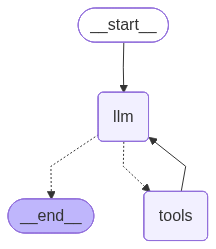

In [164]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [166]:
#tell me the stock price of Nvidia--> it will call the tool from the get_stock_price
# ------> llm (routing) dot edge is nothing but the conditional edge which will decide which tool to call based on the user query and return the output of the tool call in the content of the result.
# we are giving a capapbility to the llm, how we giving the capability to the llm, --->we are giving the capability to the llm by adding the tool node in the graph and connecting the llm node to the tool node with the conditional edge which will decide which tool to call based on the user query and return the output of the tool call in the content of the result.
# binidg the tool and system propmt tools
# routing perform the conditional routing based on the user query and call the appropriate tool and return the output of the tool call in the content of the result.
# we can use the mcp. This is the basic agent workflow or orchastration workflow

In [ ]:
result = app.invoke({
    "messages": [HumanMessage(content="what is the stock price of TCS.NS?")]
})

In [ ]:
result 

{'messages': [HumanMessage(content='what is the stock price of TCS.NS?', additional_kwargs={}, response_metadata={}, id='b2dbc1eb-7e2c-4c43-9fda-09accdebf980'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_stock_price', 'arguments': '{"ticker": "TCS.NS"}'}, '__gemini_function_call_thought_signatures__': {'4dfddfc2-a2a2-470b-939d-1f0ecce7053d': 'CtABAb4+9vsBFKSpRwlt/gg4X8J64NPr8Ag78q6Kj31FVcRdpu0bT1m7KymyR4IdxGAN3QOTYw2heQ4aiJPS9yGGCWTYsezYW5rOYni+kwa66tR3FBMNhpwz+hndUtYuz5zyEeRy6EUi0724dyl8M6gTNZ/J3fqIf79VLGjcX6zK2R4g4zVepl7h8lasnGi/NRSW4/lqFm1yNycJdHge/Kpfq+q7pCN6Txlb5/LfbYQy5HtcT8GAg4kjM+2zcl7XPRa24y57peNHl0B+BtyuXycI+Q=='}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c75c1-b6c6-7751-86ab-1972acb93340-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'TCS.NS'}, 'id': '4dfddfc2-a2a2-470b-939d-1f0ecce7053d', 'type': 'tool_call'}], invalid_

In [ ]:
"""how to track the result"""
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the stock price of TCS.NS?
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (4dfddfc2-a2a2-470b-939d-1f0ecce7053d)
 Call ID: 4dfddfc2-a2a2-470b-939d-1f0ecce7053d
  Args:
    ticker: TCS.NS
================================= Tool Message =================================
Name: get_stock_price

The last closing price of TCS.NS was ₹2677.90.
================================== Ai Message ==================================

The last closing price of TCS.NS was ₹2677.90.


In [ ]:
result = app.invoke({
    "messages": [HumanMessage(content="what was in the latest indian union budget report of 2026?")]
})

In [ ]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

what was in the latest indian union budget report of 2026?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (07a88b48-9a1c-447a-9d69-8db67fa0a8b4)
 Call ID: 07a88b48-9a1c-447a-9d69-8db67fa0a8b4
  Args:
    query: Indian union budget report of 2026
================================= Tool Message =================================
Name: wikipedia

Page: 2025 Union budget of India
Summary: The  2025 Union budget of India was presented by Finance Minister Nirmala Sitharaman on 1 February 2025 for the financial year 2025-2026. This was the first full financial year budget of Prime Minister Narendra Modi's third term in office.

Page: Military budget of India
Summary: The military budget or defence budget of India is the portion of the overall budget of Union budget of India that is allocated for the funding of the Indian Armed Forces. The mi
===============

In [ ]:
result = app.invoke({
    "messages": [HumanMessage(content="give me the latest AI news count the length of response and multiply that response with the 10.")]
})

In [ ]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

give me the latest AI news count the length of response and multiply that response with the 10.
================================== Ai Message ==================================

[{'type': 'text', 'text': 'I am sorry, I cannot give you the latest AI news. The available tools do not have the capability to fetch real-time news.', 'extras': {'signature': 'CoUFAb4+9vs3s5ykt2UV/bpaNW3deA1JwW6XWYv+BGwzXjpt/tPBO4wsBm6MPbku36uGaHAZAuLZ8e4NoLlyAJHHaTf1OeNTK+hfIiG5jAkKpRAZxYFpQQzkeWvkbNkM8A3NGFxh63277or0MvGA+JXpVsoleGPfdNxx6IuptJEH2vKDBF58/yjqJMuxY/RdXPdVagblahEELXLtnGepzpy3UVzSwNqJftEgPnARN1Q8tkxtfIfUv9aya6plt32sgcbNk4rIweqfwYlIr9oIs8ZmvKqMVhcJVNJWFJRuUoV4Tk4igiZ2/u2o1GxPT8dDpbIZHJp8plBgjjiMrKHWALAjO0EqHZw5bl4EBUHylH8k0e0DuyOR+1WCLtLiJhJ/v6lg7ik9FOcd0vFmcJc7koMxuZFsw2w0q/lKhdzNorbH+u3swfS4hcdtLm7NdBhFFN1wrXY4ZFn1vBTCpj9eC86oYpKydBWYc8XpV9WRNlpMEL/MWbTaaPPslgrQVDy7dtsTj4KyKRF9RkhFOV/5zdXf7+ZEahFZJLGOaHAPEg1DDI3c88tQ

In [ ]:
result = app.invoke({
    "messages": [HumanMessage(content="how did trump's tariff policy impact the TCS.NS?")]
})

In [ ]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

how did trump's tariff policy impact the TCS.NS?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (e6bfbf3b-1ba8-46c2-ba57-01a49f8bfa1a)
 Call ID: e6bfbf3b-1ba8-46c2-ba57-01a49f8bfa1a
  Args:
    query: Trump's tariff policy
  wikipedia (2feb3522-1595-48af-a079-ea618c6b0d2b)
 Call ID: 2feb3522-1595-48af-a079-ea618c6b0d2b
  Args:
    query: TCS.NS
================================= Tool Message =================================
Name: wikipedia

Page: Tariffs in the second Trump administration
Summary: During his second term as President of the United States, Donald Trump enacted a series of steep tariffs affecting nearly all goods imported into the country. From January to April 2025, the overall average effective US tariff rate rose from 2.5% to an estimated 27%—the highest level in over a century. After changes and negotiations, the overall average e

In [ ]:
# proper planning and proper execution is achieved by the deepagents 